In [15]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.cross_validation import train_test_split

In [2]:
cars = pd.read_csv('~/Datasets/used_cars.csv')

In [3]:
cars.head()

,price,year,miles,doors,type
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car


In [4]:
cars['price'].describe()

count       14.000000
mean      6571.428571
std       6161.097376
min       1300.000000
25%       2125.000000
50%       3500.000000
75%       9375.000000
max      22000.000000
Name: price, dtype: float64

In [6]:
cars['year'].value_counts()

2003    3
2010    2
2004    2
1999    1
1997    1
2012    1
2009    1
2007    1
2006    1
2001    1
Name: year, dtype: int64

In [7]:
cars['type'].value_counts()

car      11
truck     3
Name: type, dtype: int64

In [8]:
cars['doors'].value_counts()

4    8
2    6
Name: doors, dtype: int64

In [9]:
cars['miles'].describe()

count        14.000000
mean     114464.285714
std       63198.242516
min       13000.000000
25%       64875.000000
50%      131000.000000
75%      162250.000000
max      209000.000000
Name: miles, dtype: float64

In [10]:
cars['is_car'] = cars['type'].apply(lambda x: 1 if x == 'car' else 0)

In [12]:
cars

,price,year,miles,doors,type,is_car
0,22000,2012,13000,2,car,1
1,14000,2010,30000,2,car,1
2,13000,2010,73500,4,car,1
3,9500,2009,78000,4,car,1
4,9000,2007,47000,4,car,1
5,4000,2006,124000,2,car,1
6,3000,2004,177000,4,car,1
7,2000,2004,209000,4,truck,0
8,3000,2003,138000,2,car,1
9,1900,2003,160000,4,car,1


In [52]:
y = cars['price']
x = cars[['year', 'miles', 'doors', 'is_car']]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    random_state=42,
                                                   test_size=0.30)

In [18]:
print x_train.shape, x_test.shape, y_train.shape, y_test.shape

(9, 4) (5, 4) (9,) (5,)


In [19]:
from sklearn.tree import DecisionTreeRegressor   ## regressor, not classification


In [20]:
decision_tree = DecisionTreeRegressor()   ## instantiates a decision tree model

In [22]:
decision_tree.fit(x_train, y_train)     ## look at the hyperparameters we can change

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [24]:
decision_tree.predict(x_train)      ## shows predictions based on the model

array([  3000.,  13000.,  14000.,   1300.,   9000.,   2000.,   2500.,
         9500.,   3000.])

In [25]:
y_train

8      3000
2     13000
1     14000
13     1300
4      9000
7      2000
10     2500
3      9500
6      3000
Name: price, dtype: int64

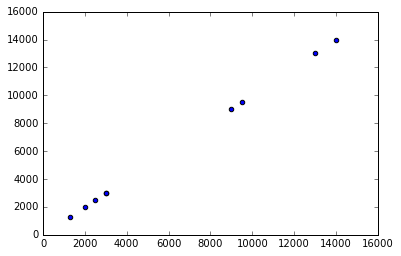

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_train, decision_tree.predict(x_train))

# ^^ this model is probably (definitely) overfit

In [28]:
from sklearn.metrics import r2_score

r2_score(y_train, decision_tree.predict(x_train))  ## we can use rsquared here because we have a regressor not a classifier

1.0

In [29]:
y_test

9      1900
11     5000
0     22000
12     1800
5      4000
Name: price, dtype: int64

In [30]:
decision_tree.predict(x_test)

array([  3000.,   3000.,  14000.,   1300.,   9500.])

In [31]:
r2_score(y_test, decision_tree.predict(x_test))  

0.65739162703757659

(0, 25000)

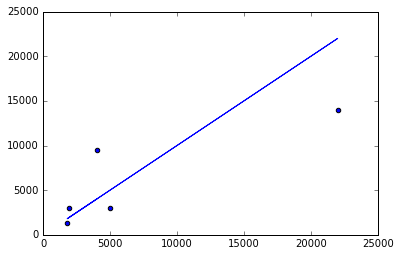

In [34]:
plt.scatter(y_test, decision_tree.predict(x_test))
plt.plot(y_test, y_test)
plt.ylim((0,25000))
plt.xlim((0, 25000))

In [35]:
def find_mse(y_true, y_pred):
    values = []
    for value in zip(y_true, y_pred):     ## zip puts the matching pairs from the two sets together
        values.append((value[0]-value[1])**2)
    return np.mean(values)

In [36]:
find_mse(y_test, decision_tree.predict(x_test))

19942000.0

In [44]:
def make_pretty_plots(y_true, y_pred):
    plt.scatter(y_true, y_pred)
    plt.plot(y_true, y_true)
    plt.ylim((0, 25000))
    plt.xlim((0, 25000))
    plt.show()

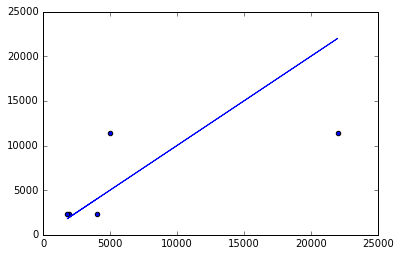

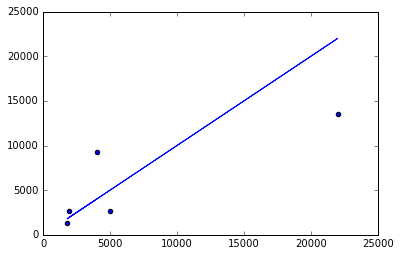

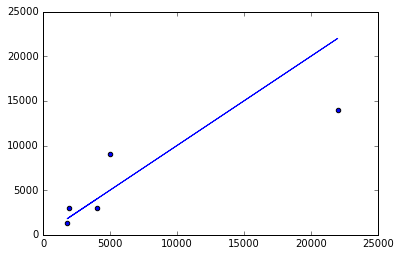

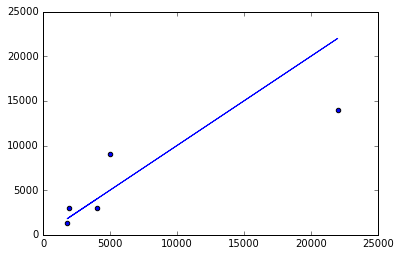

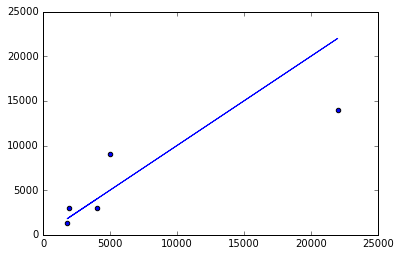

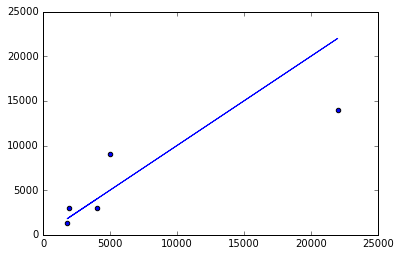

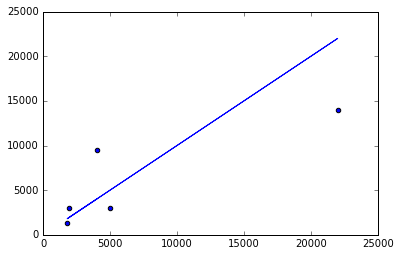

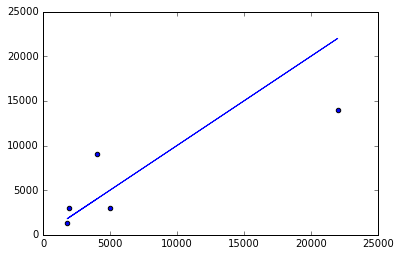

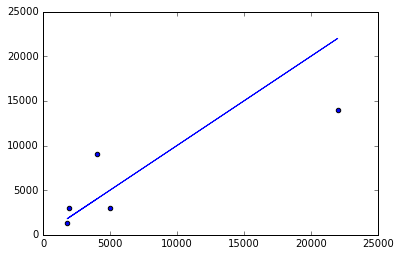

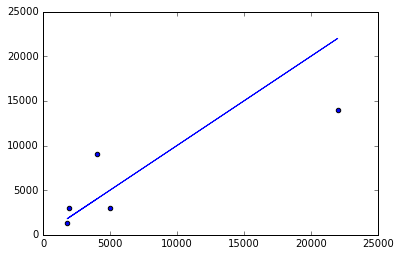

In [45]:
list_of_mse = []

for x in range(1, 11):
    new_decision_tree = DecisionTreeRegressor(max_depth=x)
    new_decision_tree.fit(x_train, y_train)
    predictions = new_decision_tree.predict(x_test)
    make_pretty_plots(y_test, predictions)
    mse = find_mse(y_test, predictions)
    list_of_mse.append(mse)

In [46]:
list_of_mse

[31349210.0,
 21245750.0,
 16492000.0,
 16492000.0,
 16492000.0,
 16492000.0,
 19942000.0,
 18892000.0,
 18892000.0,
 18892000.0]

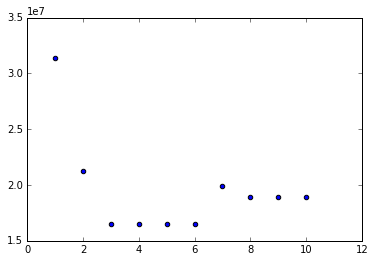

In [47]:
plt.scatter(range(1,11), list_of_mse)

In [54]:
print x.columns

Index([u'year', u'miles', u'doors', u'is_car'], dtype='object')


In [55]:
decision_tree.feature_importances_      ## the impact of each feature

array([ 0.99348247,  0.0037243 ,  0.        ,  0.00279323])

In [67]:
feature_names = ['year', 'miles', 'doors', 'is_car']

from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydot

dot_data = StringIO()  


export_graphviz(decision_tree, out_file=dot_data,  
                feature_names=feature_names,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

NameError: global name 'dot_parser' is not defined

## Use gridsearch on random forest

In [68]:
from sklearn.grid_search import GridSearchCV

In [70]:
params = {'max_depth' : [1,2,3,4],
         'max_features' : [1,2,3,4],
         'max_leaf_nodes' : [2,3,5]}

In [74]:
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(),
                           param_grid=params,
                           verbose=10)
decision_function = DecisionTreeRegressor()
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] max_features=1, max_leaf_nodes=2, max_depth=1 ...................
[CV]  max_features=1, max_leaf_nodes=2, max_depth=1, score=-0.749595 -   0.0s
[CV] max_features=1, max_leaf_nodes=2, max_depth=1 ...................
[CV]  max_features=1, max_leaf_nodes=2, max_depth=1, score=-1.601765 -   0.0s
[CV] max_features=1, max_leaf_nodes=2, max_depth=1 ...................
[CV]  max_features=1, max_leaf_nodes=2, max_depth=1, score=0.763279 -   0.0s
[CV] max_features=1, max_leaf_nodes=3, max_depth=1 ...................
[CV]  max_features=1, max_leaf_nodes=3, max_depth=1, score=-0.980574 -   0.0s
[CV] max_features=1, max_leaf_nodes=3, max_depth=1 ...................
[CV]  max_features=1, max_leaf_nodes=3, max_depth=1, score=-1.601765 -   0.0s
[CV] max_features=1, max_leaf_nodes=3, max_depth=1 ...................
[CV]  max_features=1, max_leaf_nodes=3, max_depth=1, score=0.894426 -   0.0s
[CV] max_features=1, max_leaf_nodes=5, max_dep

[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   7 tasks       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  12 tasks       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  24 tasks       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:    0.2s


[CV]  max_features=2, max_leaf_nodes=2, max_depth=2, score=0.763279 -   0.0s
[CV] max_features=2, max_leaf_nodes=3, max_depth=2 ...................
[CV]  max_features=2, max_leaf_nodes=3, max_depth=2, score=0.501689 -   0.0s
[CV] max_features=2, max_leaf_nodes=3, max_depth=2 ...................
[CV]  max_features=2, max_leaf_nodes=3, max_depth=2, score=0.357541 -   0.0s
[CV] max_features=2, max_leaf_nodes=3, max_depth=2 ...................
[CV]  max_features=2, max_leaf_nodes=3, max_depth=2, score=0.894426 -   0.0s
[CV] max_features=2, max_leaf_nodes=5, max_depth=2 ...................
[CV]  max_features=2, max_leaf_nodes=5, max_depth=2, score=0.560811 -   0.0s
[CV] max_features=2, max_leaf_nodes=5, max_depth=2 ...................
[CV]  max_features=2, max_leaf_nodes=5, max_depth=2, score=0.223938 -   0.0s
[CV] max_features=2, max_leaf_nodes=5, max_depth=2 ...................
[CV]  max_features=2, max_leaf_nodes=5, max_depth=2, score=0.823279 -   0.0s
[CV] max_features=3, max_leaf_nodes

[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  60 tasks       | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks       | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  84 tasks       | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  97 tasks       | elapsed:    0.5s


[CV]  max_features=3, max_leaf_nodes=3, max_depth=3, score=0.501689 -   0.0s
[CV] max_features=3, max_leaf_nodes=3, max_depth=3 ...................
[CV]  max_features=3, max_leaf_nodes=3, max_depth=3, score=0.357541 -   0.0s
[CV] max_features=3, max_leaf_nodes=3, max_depth=3 ...................
[CV]  max_features=3, max_leaf_nodes=3, max_depth=3, score=0.443607 -   0.0s
[CV] max_features=3, max_leaf_nodes=5, max_depth=3 ...................
[CV]  max_features=3, max_leaf_nodes=5, max_depth=3, score=0.521757 -   0.0s
[CV] max_features=3, max_leaf_nodes=5, max_depth=3 ...................
[CV]  max_features=3, max_leaf_nodes=5, max_depth=3, score=0.906509 -   0.0s
[CV] max_features=3, max_leaf_nodes=5, max_depth=3 ...................
[CV]  max_features=3, max_leaf_nodes=5, max_depth=3, score=0.530410 -   0.0s
[CV] max_features=4, max_leaf_nodes=2, max_depth=3 ...................
[CV]  max_features=4, max_leaf_nodes=2, max_depth=3, score=0.496419 -   0.0s
[CV] max_features=4, max_leaf_nodes

[Parallel(n_jobs=1)]: Done 112 tasks       | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 127 tasks       | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 144 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    0.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2, 3, 4], 'max_leaf_nodes': [2, 3, 5], 'max_depth': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=10)

In [75]:
grid_search.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=1,
           max_leaf_nodes=3, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [76]:
grid_search.best_score_

0.76628115946324371

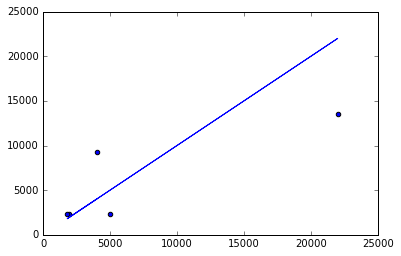

In [77]:
best_estimator = grid_search.best_estimator_
predictions = best_estimator.predict(x_test)
make_pretty_plots(y_test, predictions)